In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Lecture 8 Decision Trees

To train a decision tree model, use syntax:

**<center>sklearn.tree.DecisionTreeClassifier()</center>**

**Key Inputs and Methods:**
- criterion: the function to measure the quality of a split. Manually set to "entropy" for ID3-like algorithm.
    - entropy(min): measure of disorder / randomness. The information gain achieved by splitting 
    - gini (min): probability of incorrectly classifying a randomly chosen element in the dataset 
- Set random_state for replication purposes (technical). [in case of a tie]
- Use .fit to train the model, .score to obtain the performance measure (accuracy), and .predict for prediction.
- automatically set to Gini index: default
- random state - tossing a coin 
- Less credible when Xs correlate

**Other Inputs (when not growing the full tree):Hyperparameters**
- max_depth: depth of the tree. depth = 1 if split once.
- max_leaf_nodes: the maximum number of leaves in a tree.
- min_samples_leaf: minimum sample size in a leave node. 
- min_samples_split: the minimum sample size for a subset to be further split.

**Attributes**

- max_features(hyperparameter):  is a hyperparameter that determines the maximum number of features considered for splitting a node in a decision tree. It controls the diversity of each split by limiting the subset of features that can be evaluated for the best split.
    - increasing: consider more features, more complex
    - decreasing: forces fewer features, less complex --> good for overfitting
- feature_importances_: the importance of each feature (based on entropy reduction). This may not be reliable if variables have high correlation. Reduction in impurity that feature provides. 
    - higher: featured played a more crucial role in decision making process during tree construction 
    - might not be accurate when features are correlated
    - Feature importance will be influenced by tree structure (DT is not robust)
    - lots of 0s--> 0 values mean they are not on the tree (not contributing to reduction of gini index)
    - decision tree is not that robust, you can change 1 or 2 feature and entire tree will be different --> 
    - by itself its pretty volatile
    - feature importance will be influenced by tree structure (DT is not robust)
    - less credible when Xs are correlated

**Practice:**

- Train a decision tree classifier. Set random state to 0. Use entropy as the impurity measure.

- Report the train and test accuracy.
- Report the feature importance
- Based on the feature importance, create a bar plot. (Use syntax: plt.bar(x, y). x is the label of bars, y is the height of bars. You may want to change "bar" to "barh" for better representation).
- Create a bar plot of feature importance. Include only those with importance > 0 (Hint: logical indexing).
- decision tree is a regressor too 

In [93]:
########################################### Dataset ######################################
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#print("The dataset has", cancer.data.shape[0], "observations, and", cancer.data.shape[1], "variables") 
#print("We have", cancer.target.shape[0], "records for target")
#print("The variables are", list(cancer.feature_names))
#print("The targets are", list(cancer.target_names))
# Note: to map the y value with the y label(i.e., target_names):
### => The index of each y label in the target_names is the y value
### => for cancer dataset, malignant = 0, and benign = 1 --> ALWAYS BASED ON INDEXING 

In [94]:
########################################### Split ######################################
from sklearn.model_selection import train_test_split

# Split data into training and test, if test size is not specified, default value  of 0.25 is applied
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, test_size = 0.25, 
                                                    random_state=42)

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt_full = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

#100% in training
#1) overfitting
#2) mechanical issue in data: y: loan or not x: loan amount (correlation between x & y`b)
#not a huge difference between training & test
#we still need to consider overfitting bc a 100% in training: always a red flag 

(1.0, 0.958041958041958)

In [96]:
#prediction 
# You can use .predict to get predictions for this new data
X_new = ...  # Your new data

# Make predictions using the trained model
predictions = dt_full.predict(X_new)
print(predictions)

TypeError: float() argument must be a string or a number, not 'ellipsis'

### Overfitting ^

- 100% in training
- 1) overfitting
- 2) mechanical issue in data: y: loan or not x: loan amount (correlation between x & y`b)
- not a huge difference between training & test
- we still need to consider overfitting bc a 100% in training: always a red flag 

### Addressing Overfitting 

We twist the "additional inputs" from the Decision Tree to address the overfitting issue. Setting proper values for these parameters can be hard. We use GridSearchCV to search for the best combination of these parameter values.

We can tell there is overfitting if the test score stays the same the the training score drops
    
**example**: 
- Let maximum depth be 3 (or 5) 
    - increasing: more complex decisions, risk of overfitting
    - decreasing: less complex, addresses overfitting
    - avoid overfitting = less splits = lower depth & lower lead nodes --> prefer lower numbers 
- min_samples_leaf: minimum sample size required to be in a leave node --> how many records to we rely on 
    - increasing: more conservative tree, leaves need to have more samples, more records leads to less noise, so we prefer bigger numbers, increasing helps create leaves with more samples, reducing overfitting by preventing the model from capturing noise 
    - decreasing: fewer samples leads to more specific and noisy patterns 
- min_samples_split: the minimum sample size for a subset to be further split (min required to split internal node) --> we prefer larger values 
    - increasing: larger number of samples to split nodes, leading to fewer splits, helps control growth of tree & prevents it from splitting too much & overfitting the training data 
    - decreasing: smaller subsets to be split, leads to more splits and complex models 

**random state**
- random state specified --> everytime you run the model, ensuring you get the same result 

[0.         0.02295084 0.         0.         0.         0.
 0.         0.59201781 0.00679754 0.         0.02270496 0.
 0.         0.         0.         0.01101566 0.         0.01986781
 0.         0.         0.0855317  0.09815693 0.09342687 0.
 0.01072974 0.         0.01404099 0.02275913 0.         0.        ]


<BarContainer object of 30 artists>

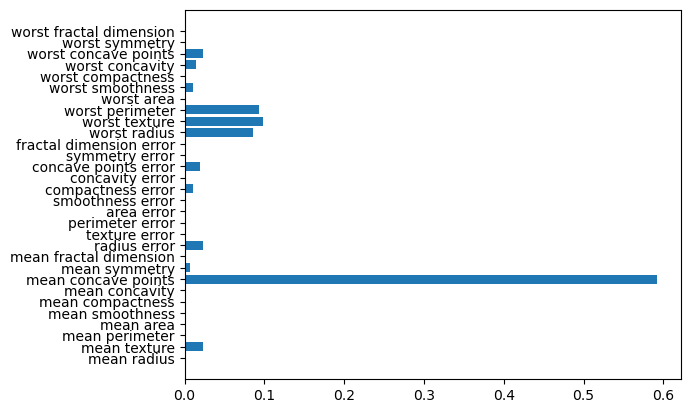

In [97]:
print(dt_full.feature_importances_) 
tree_x = cancer.feature_names
tree_y = dt_full.feature_importances_
plt.barh(tree_x, tree_y) #bar horizontal to see labels clearer

# 0 values: not on the tree

<BarContainer object of 12 artists>

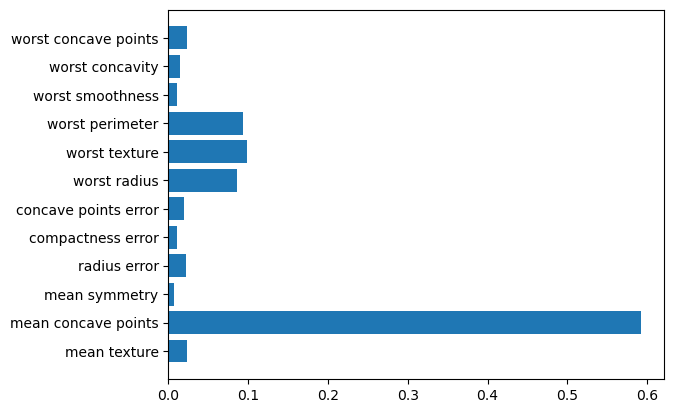

In [98]:
# Bar plot, excluding variables with feature importance = 0
## Hint: consider logical indexing
idx = dt_full.feature_importances_>0
tree_xpos = tree_x[idx]
tree_ypos = tree_y[idx]
plt.barh(tree_xpos, tree_ypos)

### Practice
###################################################
- Train a decision tree with maximum depth = 3. Then report the test accuracy.
- Train a decision tree with GridSearchCV, report the best model's hyperparameters, as well as the test accuracy [The model can take several seconds to run]. Set random state to 0 for replication purpose.
    - Choose max_depth from all positive integers below 10
    - Choose min_samples_split from all integers between 2 and 10 (inclusive)
    - Choose max_leaf_nodes from be integers between 2 and 10 (inclusive)

In [99]:
# Let maximum depth be 3

from sklearn.tree import DecisionTreeClassifier

# A Basic Tree
tree_3 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree_3.fit(X_train, y_train)
print(tree_3.score(X_train, y_train))
print(tree_3.score(X_test, y_test))

#test performance is the same as previous model & training score drops --> proves there was overfitting


0.971830985915493
0.958041958041958


### GridSearch + CV

- decision tree set of hyperparameters - jointly tuning multiple hyperparameters (was commas,)
- walks through all possible combinations: 9 potential max depths (1-9),9 potential values for split, 9 values for leaf nodes 
- (9*9*9*5 = 5,000 models / 5,000 trainings) (5 - 5 fold cross validation)

In [100]:
opt_tree = DecisionTreeClassifier(random_state = 0) # Gini index (default), random state specified

# A set of hyperparams: separate elements with ,
# Walk through all possible combinations: 9*9*9: roughly 1000 models, 5000 trainings (5-fold cv)

dt_params = {'max_depth':  range(1,10)         , # reduce max_depth
             'min_samples_split':   range(2,11), # meaningless value: consider sample size, can be 100, 500, or greater values
             'max_leaf_nodes':    range(2,11)   } #meaning integers 2-10 inclusive

grid_tree = GridSearchCV(opt_tree, dt_params, cv = 5)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

### Hyperparameters
- Report the best hyperparameters chosen
- optimal combination 
- having these requirements doesn't mean these requirements are binding meaning "="
- depth <= 3, leaver <= 6, min sample >= 9 (most samples will be greater than 9, does not mean you will have a subrecord with only 9)

In [101]:
# Report the best hyperparameters chosen

print(grid_tree.best_params_) # different from requirements binding. "="

## depth <= 3, leaves <= 6 , min samples >= 9 does not mean you will have a subsample with 9 records

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 9}


In [102]:
#QUESTION 1 (b)
best_depth = grid_tree.best_params_
best_model = grid_tree.best_estimator_
test_accuracy = best_model.score(X_test, y_test)  
validation_accuracy = grid_tree.best_score_

print("Best Parameters: ", best_depth)
print("Best Score: ", test_accuracy)
print("Best Model: ", validation_accuracy)


Best Parameters:  {'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 9}
Best Score:  0.958041958041958
Best Model:  0.9318467852257182


## Post Pruning

Post pruning controls the size of the tree after its been fully grown, so it uses cost complexity (ccp) to prune the three. Recall that when computing cost complexity, alpha is introduced. When alpha is larger, the tree we obtain will be smaller.

### The General Process

To conduct post pruning, we need to first determine a handful of alphas. Then, train decision tree models with different alphas, and choose the best model. 
- The key concept in post pruning is the use of cost complexity (ccp) to quantify the trade-off between the complexity of the tree (size) and its goodness of fit to the training data. A hyperparameter called alpha is introduced, and by adjusting its value, we can control the size of the resulting pruned tree.

#### Step 1: Obtaining the Alphas

Instead of setting alphas manually, there exists math proof showing that a set of effective alphas can be obtained through the model training process. Instead of blindly choosing by ourselves, we can use these alphas as the choices of hyperparameters. (For technical details of how effective alphas are calculated, check https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning and references therein.)


To obtain effective alphas, instead of using MODEL_NAME.fit() to train the decision tree, now use syntax:

**<center>MODEL_NAME.cost_complexity_pruning_path </center>**

In other words, the syntax would be: MODEL_NAME.cost_complexity_pruning_path(X_train, y_train). It will help obtain the paths (intuitively, the ways to get subtrees) of the post-pruning process. 

The syntax will provide two outputs: ccp_alphas, and impurities. Use multiple assignment to collect the two outputs.

#### Hyperparameters: 
- ccp_alphas: Set of effective alphas obtained from the pruning process.
    - Larger alpha values lead to smaller tree sizes and larger total impurity in the leaf nodes. The more aggressively the tree is pruned, leading to a simpler tree.
- impurities: The total impurity of the leaf nodes at each step of the pruning process.
    - The impurity measure is used to quantify the uncertainty or disorder in the leaf nodes, and larger impurity values indicate less purity --> higher impurity values lead to LESS overfitting (and more underfitting) 
    - low impurity: more overfitting 
- The goal is to find the best model that achieves a good balance between simplicity (small tree) and accuracy on the training data.

The syntax below will train the decision tree classifier and save the alphas.

In [11]:
from sklearn.tree import DecisionTreeClassifier

# decision tree model
clf = DecisionTreeClassifier(random_state=0)

# model training - obtain the path of post-pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)

effective_alphas, impurities = path.ccp_alphas, path.impurities

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00232826, 0.00312989, 0.00459972, 0.00596017,
       0.00794511, 0.01213836, 0.01341382, 0.01516793, 0.01610939,
       0.02658769, 0.02752968, 0.32476748])})

In [12]:
dt_grid.best_params_

{'ccp_alpha': 0.012138357208779744}

# Lecture 8 SVM and Naive Bayes

## Support Vector Machine
SVM aims to find a hyperplane that best separates the data points of different classes while maximizing the margin between them. Based on whether the separator is linear (i.e., using kernel function or not), we classify the SVM approach into two types: linear SVM and kernel SVM. These two approaches are realized through different syntax in Scikit-Learn. 

Recall that we also mentioned hard/soft-SVM, based on whether the classifier allows for noisy data points. This difference will be accommodated using different values of hyperparameter C. We set C to a very large number as an approximation of hard-margin SVM.

### Linear SVM
For a baisc Linear SVM classifier, we use syntax:
**<center>sklearn.svm.LinearSVC()</center>**
- **C:** Hyperparameter of how acceptable the model is for margin violations. Smaller C indicates more acceptability. Default value is 1.
- Set random state for technical reasons.

#### Practice 
############################################################################
- Load cancer data (sklearn.datasets.load_breast_cancer), use all variables (except the target) as predictors, split the data.
- Train a linear SVC, leave all settings as default. 
    - What is the training and test score?
- Train a linear SVC with grid search and 5-fold cross validation. *(Hint: You may want to set n_jobs = 2 as an input parameter for GridSearchCV. This saves some time for computation)*
    - Let choices of C be: [0.001, 0.01, 0.1, 1, 10, 100, 100000]. 
    - What is the the best C? 
        - Categorization Based on C Hyperparameter: 
        - Hard-margin SVM: Large C values; the model is less tolerant of margin violations, aiming for a more strict separation of classes. infinite = hard margin
        - Soft-margin SVM: Small C values; the model is more tolerant of margin violations, accommodating noisy or overlapping data points.
    - Under this case, what is the training and test score? 
    
### SVM with Kernel Functions: Hyperparameters
In most cases, SVM comes together with kernel functions, so that the classifier can handle non-linear separable cases. For implementation, we use syntax:
**<center>sklearn.svm.SVC()</center>**
- First, be aware that the last three letters, SVC, are capitalized.
- **C:** used to specify how acceptable for margin violations. Same as linear case. Similar to linear SVM, it controls the trade-off between a smooth decision boundary and classifying training points correctly.
- **kernel:** used to specify the kernel function. Choose from {'linear', 'poly', 'rbf', 'sigmoid', 'recomputed'}. These are different kernel functions. We introduced only two of them (i.e., poly and rbf). The default value is 'rbf'.
- **degree:** used when kernel='poly', to specify the polynomial degree. Default value = 3.
- **gamma:** used when kernel = 'rbf', we can set it manually. Default is relevant to feature number and feature variations.
- Set random state for technical reasons.

- default choice is RBF 
- degree is active based on which kernal you are using 
- default kernal: specify gamma

To explore other details, check https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#### Practice  
############################################################################
- Use the same cancer data and training-test splittion. Train an SVM model, let kernel function be rbf, leave other parameters and hyperparameters as default. What is the accuracy for training set and test set?
- Train an SVM model, let kernel function be rbf. 
    - Apply grid search with 5-fold CV. Let choices of C be: [0.001, 0.01, 0.1, 1, 10, 100, 10000]. 
    - Let choices of gamma be: [0.0001, 0.001,0.001,0.1,1,10]. 
    - Which model is the best? 
    - What is the performance of the training and test set?

In [103]:
########################################### Dataset ######################################
from sklearn.datasets import load_breast_cancer # Loading all info of cancer dataset
cancer = load_breast_cancer()
print("Key Elements", cancer.keys())
# cancer.target_names
# cancer.feature_names
# print(cancer.DESCR)

########################################### Split ######################################

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

Key Elements dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### Basic SVC: Naive Model & Grid Search 

In [104]:
# Linear SVC 
from sklearn.svm import LinearSVC
lr_svc = LinearSVC(random_state = 0) #default C = 1
lr_svc.fit(X_train, y_train)
print("Linear SVC with Default Settings - Test Score:", lr_svc.score(X_test, y_test))
print("Linear SVC with Default Settings - Training Score:", lr_svc.score(X_train, y_train))

# Linear SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define Function
linear_svc = LinearSVC(random_state = 22) # must specify random state here, always fix random state so you are comparing models fairly

# Define a list of hyperparameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000] }
grid_lrsvc = GridSearchCV(linear_svc, params_svc, n_jobs = 2)
grid_lrsvc.fit(X_train, y_train)

Linear SVC with Default Settings - Test Score: 0.965034965034965
Linear SVC with Default Settings - Training Score: 0.9225352112676056


/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/prachidalal/opt/anaconda3/lib/python3.9/sit

GridSearchCV(estimator=LinearSVC(random_state=22), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

### Best Hyperparameters with Grid Search

In [105]:
train_accuracy_grid_lrsvc = grid_lrsvc.best_estimator_.score(X_train, y_train)
test_accuracy_grid_lrsvc = grid_lrsvc.best_estimator_.score(X_test, y_test)

print("\nLinear SVC with GridSearchCV - Best C:", grid_lrsvc.best_params_['C'])
print("Linear SVC with GridSearchCV - Training Accuracy:", train_accuracy_grid_lrsvc)
print("Linear SVC with GridSearchCV - Test Accuracy:", test_accuracy_grid_lrsvc)
print(grid_lrsvc.best_params_)


Linear SVC with GridSearchCV - Best C: 0.001
Linear SVC with GridSearchCV - Training Accuracy: 0.9178403755868545
Linear SVC with GridSearchCV - Test Accuracy: 0.9300699300699301
{'C': 0.001}


### CPU available

In [106]:
import os
n_cpu = os.cpu_count()
n_cpu

8

### Kernel SVC: Tuned Model

In [107]:
from sklearn.svm import SVC
k_svc = SVC(random_state = 0, kernel = 'rbf')
k_svc.fit(X_train, y_train)
k_svc.score(X_test, y_test)
#not much better

0.951048951048951

In [108]:
#tune model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
base_svc = SVC(random_state = 0, kernel = 'rbf') #have to specify kernal if it is a polynomial kernal

#define a list of parameters
param_svc_kernel = {'C':    [0.001, 0.01, 0.1, 1, 10, 100, 10000] ,
                    'gamma':   [0.0001, 0.001,0.001,0.1,1,10]   } # C = 10,000 mimics hard-margin SVM

#large c mimics hard margin 

#apply grid search
grid_ksvc = GridSearchCV(base_svc, param_svc_kernel, cv = 5, n_jobs=2)
grid_ksvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],
                         'gamma': [0.0001, 0.001, 0.001, 0.1, 1, 10]})

### Best Hyperparameters

In [114]:
print(grid_ksvc.best_params_)
print(grid_ksvc.score(X_train, y_train))

{'C': 10, 'gamma': 0.0001}
0.9741784037558685


In [115]:
best_depth = grid_ksvc.best_params_
best_model = grid_ksvc.best_estimator_
test_accuracy = best_model.score(X_test, y_test)  
validation_accuracy = grid_ksvc.best_score_

print("Best Parameters: ", best_depth)
print("Best Score: ", test_accuracy)
print("Best Model: ", validation_accuracy)

Best Parameters:  {'C': 10, 'gamma': 0.0001}
Best Score:  0.958041958041958
Best Model:  0.9412311901504788


### svm with bagging 

In [112]:
#know how to use svm with bagging 
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Create a BaggingClassifier with SVM as the base estimator
bag_svm_clf = BaggingClassifier(svm_model, n_estimators=200, max_samples=100, 
                                random_state=42)

# Fit the BaggingClassifier on the training data
bag_svm_clf.fit(X_train, y_train)

# Evaluate the performance on the test set
score = bag_svm_clf.score(X_test, y_test)
print("Test score for Bagging with SVM:", score)

Test score for Bagging with SVM: 0.9370629370629371


## Lecture 8: Naive Bayes

Naive Bayes can be implemented in several ways. We discuss two specific cases in today's class: (1) If all predictors are categorical, and (2) If some or all predictors are continuous.

#### Categorical Features
If all predictors are categorical, use syntax:

**<center>sklearn.naive_bayes.CategoricalNB()</center>**
- alpha: A smoothing factor. 
    - The default value is 1. To get the same result as manually calculated, set alpha = 0. 
    - Setting alpha to 0 is equivalent to not applying any smoothing.

#### Continuous Features
If all predictors are continuous, we would need to use one of the methods below: Bin the continuous variable into discrete categories.
1. Bin the continuous variable first, then use the previously mentioned syntax, sklearn.naive_bayes.CategoricalNB(). *We do not discuss on this method in here.*

2. Assume the data follows a normal distribution. Then we can use the syntax below: 

**<center>sklearn.naive_bayes.GaussianNB()</center>**

For both models (i.e., categorical NB and Gaussian NB), we can obtain predicted probability for each class using .predict_proba. 

#### Practice 1
############################################################################
Replicate the result of the in-class practice (i.e., firm report example, probability = 0.47).

In [26]:
# Plug in data: 
## Charges: =1 if yes, =0 if no.
## Size: =1 if large, =0 if small
## Y: =1 if T, =0 if F
#alpha = 0, not specifying anything 
#probability based approach 
X = np.array([[1,0], [0,0], [0,1], [0, 1], [0,0], [0,0], [1,0], [1,1], [0,1], [1,1]])
Y = np.array([1,1,1,1,1,1,0,0,0,0])

In [27]:
from sklearn.naive_bayes import CategoricalNB
cat_nb = CategoricalNB(alpha = 0) #alpha = 0 because not smoothing 
cat_nb.fit(X,Y) #throwing all Xs and Ys because in class practice is used using all the Xs and Ys (not splitting)
cat_nb.score(X,Y)
# New Record: Yes, Small

0.8

### Predict Proba of a new X [0,1]

In [29]:
#categorical naive bayes 
X_new = [[1,0]]
print(cat_nb.predict(X_new))
#y pred = array[0] --> y being truthful is smaller than 0.5 given the results 
print(cat_nb.predict_proba(X_new)) #first probability is y = 0 and second column is y = 1 (y being truthful)
cat_nb.predict_proba(X_new)[0,1]

[0]
[[0.52941176 0.47058824]]


0.4705882353003458

### Gaussian Naive Bayes

In [30]:
from sklearn.datasets import load_iris
iris = load_iris() 
# load the complete data information in. It consists both data and descriptive info.
iris.keys()

# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=22)
#multiclassification - multiple types of flowers 

In [31]:
# Training the Model
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
g_nb.score(X_test, y_test)

0.9736842105263158

## the predicted probabilities for each class (setosa, versicolor, and virginica) generated by a Naive Bayes classifier (likely Gaussian Naive Bayes) on the Iris dataset
- Each row corresponds to a different sample in the test set.
- Each column corresponds to a different class ('setosa', 'versicolor', 'virginica').
- The values in each row represent the predicted probability of the corresponding class for that sample.
- For example, in the first row:
    - Probability of 'setosa': 1.00000000e+000 (approximately 1, or 100%)
    - Probability of 'versicolor': 1.46393987e-015 (very close to zero)
    - Probability of 'virginica': 1.72483299e-025 (very close to zero)

In [32]:
print(iris.target_names)
#g_nb.predict_proba(X_test)

['setosa' 'versicolor' 'virginica']


# Lecture 9 Ensemble Methods

## 1. Ensemble Methods

We will work on four topics under ensemble methods: 
- (1) voting classifier, 
- (2) bagging, 
- (3) random forest, and 
- (4) AdaBoost. 
To show the value of ensemble methods, we use with a classification problem that is NOT linear separable. In below, we first generate and split the data.

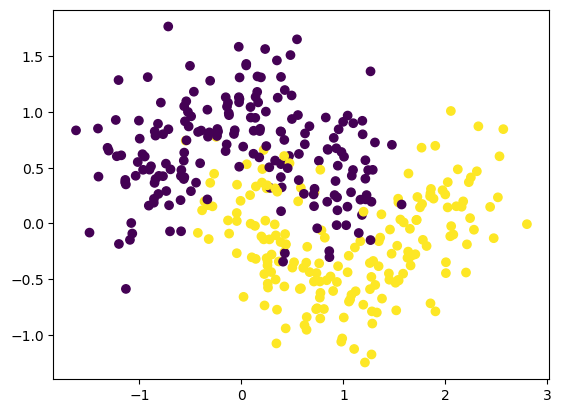

In [33]:
########################################### Dataset ######################################
# Data Generation
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
#test when noise is really small (0.03)
# make_moons will generate two moon-shaped datasets

########################################### Split ######################################
# Data Splittion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Visualize our data
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)

### Lecture 9: Voting Classifier

Voting classifier will take the result of multiple classification models to make the final prediction (based on majority vote). Therefore, we need to specify a couple of classification models first. Note that in practice, this process is more natural. Suppose we try different models and are debating on which one to choose. Voting classifier is saying that, we can combine the result instead of choosing only one of them.

The process is realized through syntax: 
**<center>sklearn.ensemble.VotingClassifier</center>**
- estimators: the models to use. You need to define a list to store all the models. Each element of a list should include two elements: ('MODEL_NAME', model). The 'MODEL_NAME' is a string.
- voting: the voting method. If "hard", then vote based on predicted label. If "soft", then vote based on predicted probability (i.e., mean of P(y=1)). Default is "hard".

Hard Voting:

- The final prediction is based on the majority vote of the individual classifiers.
- For example, if two out of three classifiers predict class A, the voting classifier will predict class A.

Soft Voting:

- The final prediction is based on the average predicted probabilities across all classifiers.
- This is relevant when classifiers provide probability estimates.
- For example, if two classifiers predict probabilities [0.6, 0.4] and - [0.7, 0.3], the soft voting classifier will predict the average probabilities [0.65, 0.35].

- The choice between "hard" and "soft" voting depends on the characteristics of the individual classifiers and the nature of the problem.

- Mean of Pihats: (pihats ≈ predicted probabilities), then soft voting involves calculating the mean of these probability estimates for each class from all the models.

Choosing Model Accordingly:

- In soft voting, the model with the highest average probability for a given class is chosen as the final prediction.

Individual Classifier Performance:

- Evaluate the performance of each classifier separately.
- Each individual classifier contributes to the ensemble, and their individual performance impacts the overall performance of the voting classifier.
- Understanding how well each classifier performs in isolation provides insights into their individual strengths and weaknesses.

Considerations: Correlated classifiers may affect performance

- If individual classifiers have diverse strengths and weaknesses, the ensemble model may achieve better generalization.
- If the classifiers are highly correlated or similar, the ensemble may not provide significant improvement.


**Practice:**
############################################################################

Suppose we want to combine the result of three classifiers: (1) Logistic Regression, (2) SVM, and (3) Naive Bayes. 
- What is the model performance of my voting classifier? 
- What is the model performance of each classifier by itself?

In [36]:
# S1: Define Functions/Estimators

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(kernel = 'rbf', random_state=42) 
nbg_clf = GaussianNB()

#eliminator --> specify models 
#calculates mean of pihats and chooses model accordingly, 
#when one of the model doesn't have a pihat, you can't do soft voting 

## What is the model performance of my voting classifier? 

In [38]:
# S2: Apply Voting Classifier

from sklearn.ensemble import VotingClassifier

# define voting classifier
voting_clf = VotingClassifier(
    estimators = [('logistic',log_clf), ('kernal_svm',svm_clf), ('Gaussian_NB',nbg_clf)]  ,
    voting = 'hard')

# train the model
voting_clf.fit(X_train, y_train)
# Performance Measure
print("Test score for voting classifier is:",voting_clf.score(X_test, y_test) )
#more models --> training will be more smooth 


Test score for voting classifier is: 0.864


## What is the model performance of each classifier by itself?

In [39]:
# Train and evaluate Logistic Regression
log_clf.fit(X_train, y_train)
logistic_score = log_clf.score(X_test, y_test)
print("Test score for Logistic Regression:", logistic_score)

# Train and evaluate SVM
svm_clf.fit(X_train, y_train)
svm_score = svm_clf.score(X_test, y_test)
print("Test score for SVM:", svm_score)

# Train and evaluate Gaussian Naive Bayes
nbg_clf.fit(X_train, y_train)
nbg_score = nbg_clf.score(X_test, y_test)
print("Test score for Gaussian Naive Bayes:", nbg_score)

Test score for Logistic Regression: 0.864
Test score for SVM: 0.896
Test score for Gaussian Naive Bayes: 0.856


### Extension: Using Loop for Automation
To compare the accuracy, we can run each model manually and print the test score. However, we can also use a loop to automate this process.

In [40]:
for clf in (log_clf, nbg_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))
    
# The trick is to find model name automatically. This is realized using: 
## clf.__class__.__name__
## Intuitively, it means: 
## for the current clf, find its model (__class__), then get its model name (__name__)
## Object Oriented Programming for Python - Class

LogisticRegression 0.864
GaussianNB 0.856
SVC 0.896
VotingClassifier 0.864


### Lecture 9: Bagging Ensemble

Bagging (Bootstrap Aggregating) is an ensemble technique that involves training the same model on multiple different resampled training sets. The idea is to introduce diversity into the models by training them on different subsets of the data and then aggregating their predictions for the final result.

Bagging will apply **one same** model on multiple **different resampled** training sets. Suppose each time, we use $B$ records to train our model, and we want to train our model $K$ times. This case, we will have $K$ different prediction results, and we would like to combine these results for our final prediction. 

Based on the above-shown process, we need to specify: (1) the model to use, (2) how many records to take each time (i.e., $B$), and (3) how many times to train our model (i.e., $K$). In Python, it can be realized using syntax:

**<center>sklearn.ensemble.BaggingClassifier()</center>**
We need to specify: 
- estimator, the model to use (e.g., logistic regression, knn, decision tree, svm, etc.) This should be specified in the first element.
- n_estimators, the number of times to run the model, i.e., $K$.
    - increasing: increasing leads to more robust and stable model. it helps reduce overfitting by averaging out predictions of multiple models. 
    - However, there is a diminishing return, and at some point, further increasing n_estimators may not significantly improve performance but will increase computation time.
- max_samples, the number of records to use to train the model, i.e., $B$.  size of each bootstrapped sample drawn from training data 
   - increasing leads to a greater diversity among the trees. On the other hand, if its too hifh values may reduce diversity and make the trees more similar. Setting max_samples to the size of the training set (or close to it) effectively disables bootstrapping, making each tree trained on the full dataset.
   - A smaller value means each tree is trained on a smaller subset of the data, introducing more randomness. 
- bootstrap, whether sample with/without replacement. Default: True.
    - bootstrap: This parameter determines whether to sample with or without replacement.
    - True (default): Sampling is done with replacement, meaning that each data point can be sampled multiple times in a given subset.
    - False: Sampling is done without replacement, ensuring that each data point is selected only once in a given subset.
- random_state, for replication (resampling procedure)

Model to Use (estimator):

1. Specify the type of model you want to use. It could be any supervised learning algorithm, such as logistic regression, k-nearest neighbors (knn), decision tree, support vector machine (SVM), etc.

2. Number of Models to Train (n_estimators): Determine how many times you want to run the model. This is denoted by N. Each run will result in a different prediction because of the use of bootstrapped samples.

3. Sample Size for Each Training (max_samples): Specify the number of records to use for training the model each time. This is denoted by B. It represents the size of the bootstrapped sample.

4. Sampling Method (bootstrap):Decide whether to sample with or without replacement. If bootstrap=True, it means sampling with replacement. If bootstrap=False, it means sampling without replacement.

5. Random State (random_state): For replication purposes, set a random state to ensure that the resampling procedure is reproducible. This is important for obtaining consistent results when Bagging.

**Note:**
Bagging goes well with models with a worse scalability. For example, SVM is often used together with bagging. In this case, SVM should be trained on smaller (bootstrapped) samples.

Diversity through Bootstrapping:

The use of bootstrapped samples introduces diversity into the training process. Each bootstrapped sample is randomly drawn with replacement from the original dataset.
This diversity helps improve the robustness and generalization of the model.
Aggregation of Predictions:

After training the decision tree 200 times on different bootstrapped samples, the final prediction for a given input is typically the majority vote (for classification) or the average (for regression) of the individual predictions.
Effective with Models with Scalability Issues:

Bagging is often used with models that have scalability issues, such as SVM. Training SVM on smaller bootstrapped samples can enhance its performance.

**Practice:**
############################################################################

Suppose we want to train decision tree with default setting on multiple samples, then combine the results. Specifically, we want to train the model 200 times (i.e., N=200), each time with a bootstrapped sample size of 100 (i.e., B=100).

In [42]:
#estimator- singular not plural- only one model 
#specify the number of records we are obtaining to train the model 
#k = how many predicted models will you get to make prediction 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(dt, n_estimators = 200, max_samples = 100, 
                            random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.904

In [43]:
#know how to use svm with bagging 
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Create a BaggingClassifier with SVM as the base estimator
bag_svm_clf = BaggingClassifier(svm_model, n_estimators=200, max_samples=100, 
                                random_state=42)

# Fit the BaggingClassifier on the training data
bag_svm_clf.fit(X_train, y_train)

# Evaluate the performance on the test set
score = bag_svm_clf.score(X_test, y_test)
print("Test score for Bagging with SVM:", score)

Test score for Bagging with SVM: 0.888


**Practice:**
############################################################################
- Now train the naive decision tree classifier. What is the accuracy for test set?

In [44]:
# Practice for you
#naive - decision tree with depth 1, test performance? 
#do the same bagging, now estimator being decision tree with depth 1, what is the performance? 

dt_naive = DecisionTreeClassifier(max_depth = 1, random_state=42)
dt_naive.fit(X_train, y_train)
print("Accuracy for a naive DT is:", dt_naive.score(X_test, y_test))

bagnaive_clf = BaggingClassifier(dt_naive, max_samples = 100, n_estimators = 200, bootstrap = True,
                            random_state=42)
bagnaive_clf.fit(X_train, y_train)
print("Bagging the naive trees, we have accuracy:", bagnaive_clf.score(X_test, y_test))

# Bagging does not guarantee performance improvement


Accuracy for a naive DT is: 0.824
Bagging the naive trees, we have accuracy: 0.808


### Lecture 9: Random Forest
Random Forest can be realized using: 
**<center>sklearn.ensemble.RandomForestClassifier</center>**

Recall that Random Forest is an implementation of ensemble learning (bagging) on decision tree models. Thus, most (if not all) the parameters in bagging and decision tree are applicable. It builds multiple decision trees and merges their predictions to improve overall accuracy and reduce overfittingBelow, we emphasize a couple of parameters:

- n_estimators: number of trees in the forest/number of times to run decision tree (how many times the decision tree model is trained) 
    - increase: leads to a more robust & stable model, helps reduce overfitting by averaging out multiple tree, but there is diminishing returns 
- max_samples: number of records to sample for each tree
    - Influences the diversity of the trees. A smaller max_samples leads to greater diversity, as each tree is trained on a smaller subset, introducing more randomness. Larger values may reduce diversity.
- max_features: number of features to choose (the $m$ in the lecture note)
    - Controls the randomness at each split. Smaller values lead to more randomness and diversity among trees. It's common to set max_features to the square root of the total number of features.
- bootstrap: True when sample with replacement
    -  If True (default), it means sampling with replacement, allowing instances to be sampled multiple times. This is a key characteristic of bagging.

Similar to DT, Random Forest can provide **.feature_importances_**. In this case, the numbers would be the mean of impurity improvement across different leaners. Higher importance indicates that the feature is more influential in making predictions.


**Practice**
############################################################################
Train a Random Forest Classifier with 200 trees, each using a bootstrapped sample with 100 instances. Let random state be 42. What is the model's performance?

In [116]:
#we do not need to specify ____, different than bagging 
from sklearn.ensemble import RandomForestClassifier
#default max number of features
rf = RandomForestClassifier(n_estimators = 200, max_samples = 100, random_state = 42) #(max_depth = 3) --> prepruning 
print(rf.fit(X_train, y_train))
print(rf.score(X_test, y_test))

#practically, we can do prepruning for each indvidual tree (are not prohibted to do prepreuning for random forest)
#syntax wise use same pre-pruning parameter names in RFC input 

RandomForestClassifier(max_samples=100, n_estimators=200, random_state=42)
0.965034965034965


#DISCUSSION*********
#The ensemble may not be effective in potentially improving model performance
#because there might be a lack of diversity. Using bootstrap allows randomness in the model which helps 
#it's ability to  generalize better to test data. Using an ensemble without replacement may lead to
#a risk of overfitting due to this lack of diversity. There is a lack of diversity because
#each tree is being trained on the dataset without duplicates. 

In [118]:
#QUESTION 4(c)
rf2 = RandomForestClassifier(n_estimators=200, max_features=2, bootstrap=False, random_state=2) 
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
#n rf2, you set bootstrap = False. This means that each tree in the forest is trained on the entire training dataset, and max_samples is ignored in this case

0.972027972027972


### Lecture 9: Adaboost
AdaBoost (Adaptive Boosting) is an ensemble learning method that focuses on a single base classifier and adapts to the weaknesses of that classifier. The key distinguishing feature of AdaBoost from bagging is the application of different weights to samples during the training process. The ensemble combines the results of individual weak learners using a weighted method.
- less prone to overfitting 

The method is realized using syntax: 
**<center>sklearn.ensemble.AdaBoostClassifier</center>**
- The first element should be the model we use.
- n_estimators: number of times to run the model. Specifies the number of times the base classifier (e.g., Decision Tree) is trained.
- learning_rate: the importance of each classifier. default is 1. Determines the contribution of each weak learner to the final combination. A smaller learning rate makes the model more robust but requires more weak learners.
    - The learning rate acts as a regularization parameter, controlling the impact of each weak learner on the overall model. A smaller learning rate generally leads to a more robust model that generalizes better to unseen data.
- random_state- Ensures reproducibility by fixing the randomization during the training process.

- #usually see a trade off between number of estimators (n_estimators) and learning rate (learning_rate)
- #higher number of estimators, significance of each model decreases 
- #more models trained --> each model is less important
- #Adaboost works by combining multiple learner models to create a strong learner model. It focuses on 
- #instances that are incorrectly classified by the previous learner model by adding a higher weight to them. 
- #The accuracy score is higher for the Adaboost model because the model is adaptively combining the predictions of the correctly trained learners. 

**Trade-off:**

Number of Estimators (n_estimators):

Increasing the number of estimators implies adding more weak learners to the ensemble.
As the number of estimators grows, the model becomes more expressive and can better fit the training data.
However, there's a diminishing return effect, and adding too many weak learners may lead to overfitting the training data.
Learning Rate (learning_rate):

The learning rate controls the contribution of each weak learner to the overall model.
A smaller learning rate makes each weak learner's contribution smaller, providing more robustness against overfitting.
Conversely, a larger learning rate allows each weak learner to have a more significant impact on the final model.

**Trade-off Relationship**:

More Estimators, Smaller Learning Rate:

- When you increase the number of estimators, you might consider reducing the learning rate.
- This combination helps in preventing overfitting by having a larger number of weak learners (reducing the risk of overfitting) and reducing the impact of each learner (providing more robustness).

Fewer Estimators, Larger Learning Rate:

- If you opt for fewer estimators, you might use a larger learning rate to compensate for the limited number of weak learners.
- This combination can make each weak learner more influential, potentially capturing more complex patterns in the data.


**Practice**
Suppose we apply Adaboost to naive DT classifier with depth = 1. Let learning rate be 0.5, random state be 42. What is the performance if we train 200 naive learners?

- This means the individual trees in the ensemble are very simple, only making decisions based on a single feature.
- AdaBoost is configured with a learning rate of 0.5, meaning each weak learner's contribution is scaled by this factor. A learning rate less than 1 often helps in preventing overfitting.
- Train 200 naive learners. This implies that 200 weak learners (Decision Trees of depth 1 in this case) are sequentially trained and combined.
- AdaBoost's weighted combination of weak learners aims to correct the errors made by previous weak learners. The focus on misclassified samples helps improve generalization and reduce overfitting. The learning rate controls the influence of each weak learner, preventing the model from fitting the training data too closely.
- improve performance on challenging instances


In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Define base model
dt1 = DecisionTreeClassifier(random_state = 42, max_depth = 1)

# AdaBoost
adaboost = AdaBoostClassifier(dt1, n_estimators = 200, learning_rate = 0.5, random_state = 42)
#learning rate is usually invalid for adaboost scenario (conceptually)
#usually see a trade off between number of estimators (n_estimators) and learning rate (learning_rate)
#higher number of estimators, significance of each model decreases 
#more models trained --> each model is less important

# Performance
adaboost.fit(X_train, y_train)
adaboost.score(X_test, y_test)

0.896

### Adaboost with GridSearchCV

In [48]:
# Define base model
dt1 = DecisionTreeClassifier(random_state=42, max_depth=1)

# AdaBoost
adaboost = AdaBoostClassifier(base_estimator=dt1, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],    # You can extend this range based on your needs
    'learning_rate': [0.1, 0.5, 1.0]        # You can extend this range based on your needs
}

# Create GridSearchCV object
grid_search = GridSearchCV(adaboost, param_grid, cv=5)  # Use cross-validation with 5 folds

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_adaboost = grid_search.best_estimator_
test_accuracy = best_adaboost.score(X_test, y_test)
print("Test accuracy with best parameters:", test_accuracy)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Test accuracy with best parameters: 0.88


# Lecture 10 Unsupervised Learning

## 1. Clustering Models

We will work on two clustering models: K-Means, and DBSCAN. Note that clustering models solve unsupervised learning problems, and there is no observed outcome variables. Therefore, there is no "overfitting" issue, and we do not need to split our data.
-  partitioning data into distinct, non-overlapping groups or clusters. The algorithm aims to group similar data points together based on their features. 
- The algorithm doesn't require labeled data; it identifies patterns and groups based on the features of the data.

### 1.1 KMeans
As mentioned in class, K-Means works well when data has a round or oval shape. In below, we would first generate data with round shape, then use K-Means for clustering.

For data generation, use: sklearn.datasets.make_blobs. 

For K-Means clustering, use syntax:
**<center>sklearn.cluster.KMeans()</center>**
- n_clusters: the number of clusters to use
    - If you set it too low, you might underfit the data, combining distinct clusters into one. If you set it too high, you might overfit the data, creating clusters for noise or individual data points.
- n_init: the number of k-means to run with different initial points. Default = 10
    - The parameter n_init controls how many times the algorithm will be run with different initializations. The default is 10, meaning K-Means will be executed ten times, and the best result in terms of SSE (Sum of Squared Errors) will be chosen.
    - Increasing n_init may improve the chance of finding a better overall clustering solution but will also increase computational cost.
- random_state: the generation of initial points

Similar to supervised learning methods, we use .fit to train our model, use .predict for prediction. Instead of predicting a "y", we are predicting a cluster label. We can even use .score to get performance measure. However, the performance measure is irrelevant to "how well we predict", but about "how close the points are". Specifically, the value is -SSE (negative value).

Performance Measure:

- The performance measure for K-Means is often the negative sum of squared errors (-SSE). It represents how close the data points are to their assigned cluster centroids.
- K-Means aims to minimize SSE by optimizing the placement of cluster centroids.

We can also use .cluster_centers_ to get the centroids. 

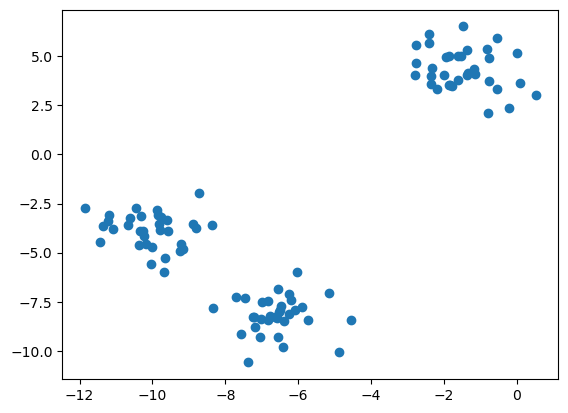

In [49]:
#we are no longer predicting "y" we are instead predicting cluster labels 
#interpretting absolute value of SSE
#no longer split our data, no longer have overfitting concern

# S1.1: Data Generation
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

# S1.2: Plot Data
plt.scatter(X[:,0], X[:,1])

In [54]:
# S2: K-Means Clustering
from sklearn.cluster import KMeans

kmeans =  KMeans(n_clusters = 3, random_state = 0)

kmeans.fit(X)
# Predict the class labels

cls_predict = kmeans.predict(X)

print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(X)) # -SSE
print("Cluster Centers: \n", kmeans.cluster_centers_)  

Predicted Labels: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
Labels: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
Performance Score: -156.28289251170003
Cluster Centers: 
 [[-10.04935243  -3.85954095]
 [ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]]


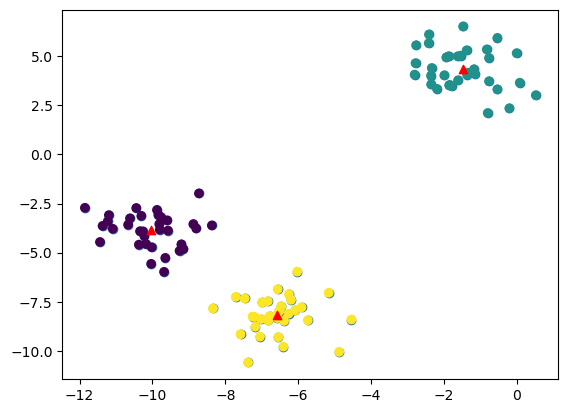

In [52]:
#S3: Visualize our results:
#how well are you doing the clustering
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c = cls_predict) # predicted label as colors

# visualizing centroids
#first two elements are x axis & y axis values
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],  marker='^', c = 'r')

### 1.2 DBSCAN
DBSCAN works well for clutering datasets with arbitrary shapes. Thus, we will create a dataset with moon shape and check its performance.

DBSCAN is realized using syntax:

**<center>sklearn.cluster.DBSCAN</center>**
- eps: the epsilon size. default is 0.5
    - Epsilon defines the radius around a data point within which the algorithm looks for neighboring points.
    - Smaller values of epsilon result in more tightly packed clusters, while larger values may merge clusters or consider distant points as part of the same cluster.
    - Choosing an appropriate epsilon is critical for the performance of DBSCAN
    - Larger epsilon values result in larger neighborhoods for points.
    - Clusters become more inclusive, potentially merging smaller clusters into larger ones.
    - May lead to the identification of fewer, larger clusters.
    - smaller episol: More clusters may be identified, especially capturing finer details in the data.
- min_samples: the MinPts. default is 5
    - MinPts is the minimum number of data points required to form a dense region (core point).
    - Increasing min_samples makes the algorithm more conservative, requiring denser regions for cluster formation.
    - A rule of thumb is to set min_samples to at least twice the number of features in the dataset.
    - increase: Results in more conservative clustering, identifying only dense and well-defined clusters. Outliers and less dense regions may be classified as noise.
    - decrease: Allows smaller sets of points to form a dense region.. Can identify less dense and more spread-out clusters. May include outliers and noise in clusters.

Instead of using .fit to train our model, we use **.fit_predict(X_INPUT)** to train and predict at the same time. The output would be the cluster labels.

#### outliers
Impact on Noise and Outliers:

- Increasing epsilon or decreasing min_samples tends to make the algorithm more permissive, potentially classifying more points as noise.
- Decreasing epsilon or increasing min_samples makes the algorithm more stringent, reducing the likelihood of noise affecting clusters.

#### Choosing eps and min_samples
DBSCAN is sensitive to the choice of parameters. A rule of thumb would be: 
- min_samples = 2* feature number;
- eps: adjusted based on number of clusters obtained. 
    - If too many clusters => increase eps, 
    - If too few clusters => decrease eps.
    
#### Parameter Tuning:

Tuning the parameters (eps and min_samples) is crucial for the success of DBSCAN. The right values depend on the density and distribution of the data.
- If the algorithm identifies too many small clusters, consider increasing epsilon.
- If the algorithm fails to find meaningful clusters, consider decreasing epsilon

#### Rescaling Data Recap (I)
One key point for DBSCAN is rescaling. As density is defined on a circle around a point, it is important to standardize the data, so that all variables have zero mean and unit variance (and in the same scale). Recall that standardization is realized using syntax:

**<center>sklearn.preprocessing.StandardScaler</center>**

Similar to all models, use .fit to train the model. Then use **.transform()** to get the scaled output.

- Standardizing or rescaling the data is essential for DBSCAN because it relies on distance measures. Ensure that all features have zero mean and unit variance.

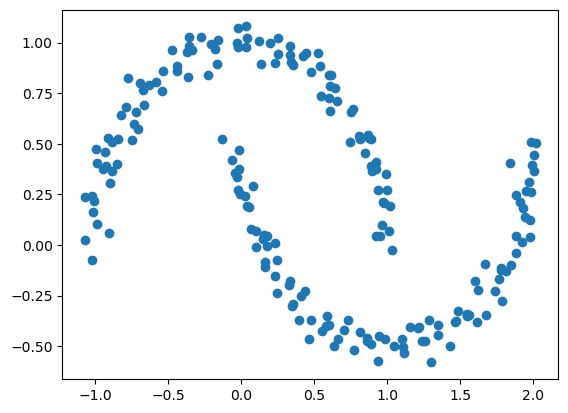

In [55]:
# Data Generation
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [56]:
# S1: Preprocessing
#2d * 2 = 4 --> min_samples calculation 
#if too few clusters --> focusing on local pattern
#esp large, fewed clusters, larger circles, more points in a circle, fewer clusters
#DB requires scaling because density is defined on the circle, assumping all points are under the same scale
from sklearn.preprocessing import StandardScaler #MinMaxScalar (look at minmax)
scaler = StandardScaler() #fit_transform (not recommended - technically feasible)
scaler.fit(X)             #particularily true when working on supervised learning 

#write fit & transform separately 
X_scaled = scaler.transform(X)

#before and after transfer (scaling)
np.mean(X), np.mean(X_scaled)
np.var(X), np.var(X_scaled)
X_scaled, X

# fit_transform is technically feasible, but not recommended to use
                            # Particularly in supervised learning problems.

(array([[ 0.36748451,  0.54576641],
        [ 1.28731953, -1.2803031 ],
        [-0.59397643,  0.04357482],
        [-1.74182239, -0.66371706],
        [ 1.45705144, -0.85667812],
        [ 1.58953574, -0.59675854],
        [ 0.54875768, -0.08552893],
        [ 0.44914675, -1.50218876],
        [ 0.46138047,  0.23124986],
        [ 0.71117525, -1.59382202],
        [-0.98693652,  1.16613579],
        [-0.28618307, -0.9941549 ],
        [ 1.51445888, -0.7760272 ],
        [ 0.82589866, -1.33505302],
        [-1.51451022,  0.79027655],
        [ 0.55545785, -0.08853775],
        [ 0.05104108,  1.284163  ],
        [-0.17030547, -1.12065006],
        [-0.1659644 ,  1.28843594],
        [-1.46106881,  1.15527198],
        [ 1.63987535, -0.48630812],
        [ 0.41814803, -1.47618916],
        [-0.34023715,  1.50810931],
        [ 0.90980627, -1.26183242],
        [-0.88905065,  1.56616629],
        [-0.29208555, -0.66541512],
        [ 1.55266276, -0.70888274],
        [ 1.59187607, -0.419

In [60]:
# S2: Apply DBSCAN
from sklearn.cluster import DBSCAN

#both esp & min_samples are default
dbscan = DBSCAN(eps=0.5, min_samples=5)
#dbscan = DBSCAN(eps=0.1, min_samples=5) --> 0.1 more clusters & more restrictive
#-1 is not a cluster label, -1 is noise / outliers ****
#find max cluster label 

clusters = dbscan.fit_predict(X_scaled)

print(clusters) #2 clusters
print("number of unique clusters: ", np.max(clusters) #7 clusters with 0.1


[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


1

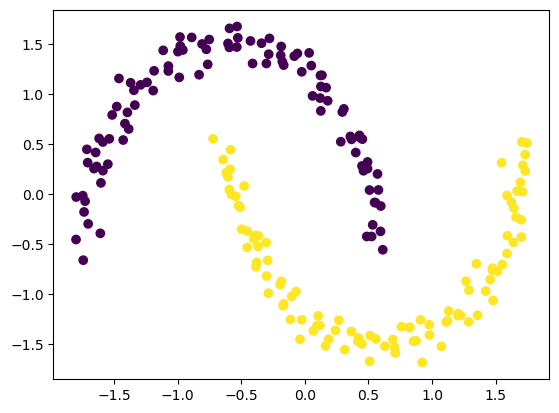

In [61]:
# S3: plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)

#lots of clusters with 0.1 --> mis-specified epsilon 

## 2. PCA
PCA is a dimension reduction tool. It transfers original $X$ to a set of $X_{new}$. Based on our specific needs, only a subset of $X_{new}$ would be kept, and the dimension would be reduced accordingly.

PCA can be realized using syntax:
**<center>sklearn.decomposition.PCA</center>**

- **n_components:** can be integer or float. 
    - If integer, then n_components is the number of components to keep; If an integer is specified, it represents the number of principal components to keep.
    - If float, then n_components is the percentage of variance explained. In this case, PCA will select the smallest number of components that explain the specified proportion of the variance.
- copy: whether to keep the original dataset. Default is True (recommended setting). If False, then the new variables will overwrite the original variable.
    - This parameter determines whether to keep a copy of the original dataset. It is usually recommended to keep the original data unchanged (default is True) as PCA modifies the input data
- whiten: bool. Default is False. If True, then new variables have variance = 1.
    - When set to True, the transformed data has a unit variance, which means that each component's variance will be 1.
- random_state: technical reasons

We can use **.fit_transform(X)** to both train the model, and produce the new variables (with dimension reduction) directly. To transfer the new data back to the original data, use **.inverse_transform(Xnew)**.

### PCA Attributes
After applying .fit_transform(), we can obtain the corresponding attributes:
- **.components_:** It shows how the new variables are generated. Recall that the new variable is a linear transfer or the original variables, the output of .components_ is the coefficients of the linear transfer. contains the principal axes in feature space. These components represent the directions of maximum variance in the original data.
- **.explained_variance_ratio_:** It shows the percentage of variance explained by each new variable. This attribute shows the percentage of variance explained by each of the selected components. It helps in understanding how much information is retained by each component.


### Practice
Suppose we have a dataset with three dimensions. The data points follow a ring-shape (on the x, y plane), but a bit tilted (on the z axis). We would like to reduce the dimension to 2 using PCA.
- After the transfer, what is the proportion of variance in the original dataset included?
- Suppose I want to keep more than 95% of the information, is the transfer proper?
- Can you write down the relationship between the new Xs and the original Xs?

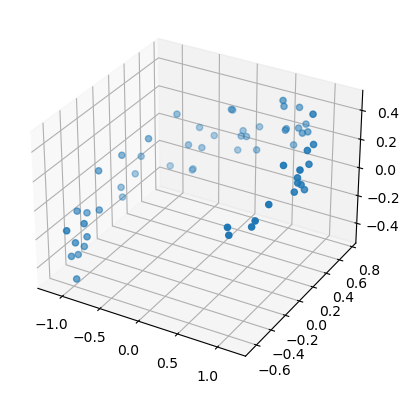

In [62]:
# S0 Data Generation - simulated data 
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

## Prep for 3D data generation
X = np.empty((m, 3))

## The "Ring"
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

## The "Tilt"
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# Visualize the data
#tilted ring, lift one side a little bit
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [65]:
# S1: Apply PCA
#reduce dimensions to 2
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2, random_state = 0, whiten = True)

X2D = pca2.fit_transform(X) #throw in original X

print("Before transfer, the dimension is:", X.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

print(X2D)

Before transfer, the dimension is: 3 
 After transfer, the dimension is: 2
[[ 1.43052231  1.14420516]
 [-0.0906973  -0.95937567]
 [ 1.3323881   0.9815019 ]
 [ 1.0122842  -0.83944409]
 [ 0.82764388 -0.69096907]
 [-1.25180887  0.54955798]
 [ 1.44256537  1.27241112]
 [-0.50931826  1.84238108]
 [-1.23955886 -0.12152024]
 [-0.75012385 -0.77929062]
 [ 1.18412978 -0.30583707]
 [-1.2007511   0.8483179 ]
 [ 1.28949241  0.39647292]
 [ 1.31536685  0.99226925]
 [-1.13540589  1.07224594]
 [ 0.31176013 -0.93540911]
 [-0.51715963  1.8959882 ]
 [-0.90347868 -0.73086809]
 [-0.75859799  1.78209033]
 [ 1.48126236  1.02462931]
 [-0.7511274  -0.88958759]
 [ 1.42127564  1.52434839]
 [ 1.17937868 -0.23738545]
 [ 1.42875838  0.42731911]
 [-1.24443808  1.05106922]
 [-0.80829996  1.76635559]
 [ 0.20161565 -1.18613059]
 [-1.16723598  0.91790273]
 [ 1.07175566 -0.62104596]
 [-0.91808211 -0.9196238 ]
 [-0.22884548 -0.95598503]
 [ 1.52138487  1.15367153]
 [-0.15415547 -1.0134039 ]
 [-0.93026042  1.49924101]
 [-1.02

In [66]:
# S2: Finding the "explained variance", or the information kept after transfer

#how much variance is explained for each component after transfer
pca2.explained_variance_ratio_ #2 values, 2 components, order matters, earlier it appears, smaller component numberm the more important it is
#(one for each component)
#sequence matters 

array([0.84248607, 0.14631839])

In [72]:
#EXAM
##suppose instead of keeping dimension to 2, keep atleast 95% of total information, without running additional code, or running the model again
#how many components should I keep? 
#0.82+0.14 = 0.98 which is greater than 0.95
#keep 1 dimension, PC1 has 84.2% of the information, need additional dimensions
#check PC1 + PC2
#check info with 2 components 
print(np.sum(pca2.explained_variance_ratio_)) #is greater than 95% which means it satisfied the requirements

#how much information is lost
print(1 - np.sum(pca2.explained_variance_ratio_))

#shows importance of components

## Suppose want to keep at least 95% of total info. W/o running model again, how many components 
## should I keep? 

## keep 1 dimension, PC1 has 84.2% of info. need additional dimensions
## check info with 2 components:
np.sum(pca2.explained_variance_ratio_)

## 98.88>95. Satisfies the requirement => keep 2 dimensions

0.988804464429311
0.011195535570688975


0.988804464429311

- ach row corresponds to a principal component (PC).
- Each column corresponds to the original features or dimensions of the dataset.
- The values in the array are the coefficients (weights) of the linear combination of the original features that make up each principal component.
- These coefficients represent the directions in the original feature space along which the data varies the most (for PC1) and the second most (for PC2).

In [67]:
# S3: Finding the transfer
#components are nothing but the linear transfer of your original variables & stores your coefficients 
#still find alphas and betas --> stored in components 
pca2.components_ # 3 columns, input X has dimension  = 3
# 2 rows, keeping 2 PCs
#3 columns, input x has dimension of 3
#2 rows- keeping 2 components  

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [55]:
# Suppose the original variables are X1, X2, X3, correspondingly
## Then: 
## X1_new = -0.936X1 -0.299X2 - 0.185X3
## X2_new = 0.340X1 - -0.901X2 - 0.268X3

### Nearest Neighbor Classification with PCA
Using KNN as an example, let's see how PCA would influence the classifiers' performance. 

For simplification, we do not seek the best k, instead, let k=1. We will start by a classifier without PCA.

In [78]:
# Load the Data
## For the first time, the code may take several minutes to run
#gray scale no RGB
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
#min faces per person- specifying people with atleast 20 pictures
#resize- original dimensionality is too high, bring down the dimension by a little bit 

In [79]:
counts=np.bincount(people.target)
counts
#is in accordance to original requirement
#number of picture per a person 

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [80]:
# Data for Analysis
X = people.data
y = people.target

from sklearn.model_selection import train_test_split

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

#stratify: guarentee proportion of y labels (ys in y train and y test) is consistent with general y, if a person has 20% of pictures, then training should also have

In [81]:
from sklearn.neighbors import KNeighborsClassifier
#more columns than number of rows??
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#without PCA, Naive Model
print("Test set score of 1-nn is:", knn.score(X_test, y_test))

Test set score of 1-nn is: 0.3253968253968254


### Scaling Data (II)

We may consider scaling the data to seek performance improvement. Then the questions would be: which scaler to use? Standard or minmax? Does my data contain outliers? Is it meaningful to keep a certain range of my transferred variable?

For minmax scaler, use:

**<center>sklearn.preprocessing.MinMaxScaler</center>**

Use .fit to train and use .transform to get the scaled the data.

In [82]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1)) #range [0,1] which is default
#fall in a sharp region of 0 to 1, after scaling, finds between 0 and 1 which is the default
#equivalent to MinMaxScalar()

#writing fit & transform separately....why? 
# Train our scaler
minmax.fit(X_train) #min and max for X_train 

#using same minmax, scaling using x_train for both

# Get scaled variables
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)
# X_train_scaled

#WRONG
#minmax.fit_transform(X_train) #scaling using minmax from x_train
#minmax.fit_transform(X_test) #scaling using minmax from x_test which is wrong 

# Below is Wrong
# minmax.fit_transform(X_train) # scaling using min and max from X_train
# minmax.fit_transform(X_test)  # scaling using min and max from X_test

In [83]:
# We can also do the scaling manually. The result might differ slightly
X_manual_train = X_train/255
# X_manual_train

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) #after scaling, training on scaled axis
print("Test set score of 1-nn is:", knn.score(X_test_scaled, y_test))
#improved 32 to 34, marginal improvement

Test set score of 1-nn is: 0.33994708994708994


### PCA
Now let's try PCA. We would like to reduce the dimension to 100. Given the training sample size be around 2000, we consider this dimension proper. Given the 100 new variables, what would be the performance of the knn classifier?

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,  whiten=True, random_state=0) #bring dimension down 100
#whiten to make sure scale has a variance of 1

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

#375: This is the number of samples or data points in your training dataset. 
#Each row in the transformed data corresponds to a sample from the original dataset.

#2: This is the number of principal components you chose to retain after performing PCA. The transformed data now has only two features (or dimensions) instead of the original number of features.

X_train_pca.shape: (2267, 100)


In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: ", knn.score(X_test_pca, y_test))
#performance is still low, but improved from 34% to 45% 
#throw away 5400 columns? 

Test set accuracy:  0.45105820105820105


In [91]:
print(np.sum(pca.explained_variance_ratio_))
#100 values because 100 components
#kept 90% of data

print(pca.components_) 
#100 records, 5500 columns to get transfer 
#for each row, the 5500 values are the grayscale for each grids 
#instead of considering it as a matrix, consider it: for each row, the 5500 values are the grrayscales for each grid 
#each value is telling you how you are going to color your little grids 
#each component has a meaning 

0.89834344
[[-0.00476362 -0.00513477 -0.00544772 ... -0.00543634 -0.00532049
  -0.00492963]
 [ 0.01327512  0.01306853  0.01297683 ... -0.02262183 -0.02181469
  -0.02068427]
 [ 0.02930908  0.02965276  0.03030199 ...  0.01828211  0.017093
   0.01590577]
 ...
 [-0.02024545 -0.02206665 -0.02153568 ... -0.02762445 -0.02206719
  -0.01464693]
 [ 0.0344951   0.03083446  0.02465328 ... -0.00295632 -0.00553183
  -0.004524  ]
 [-0.01149235 -0.00711852 -0.00114776 ... -0.01889203 -0.02221774
  -0.0268353 ]]
